<font size=5  color=#003366> **[LGBIO2020] - Bioinstrumentation <br><br> 
Practical session 01 - Source Separation ** </font> <br><br><br>

<font size=5  color=#003366>
Prof. M. Verleysen<br>
Prof. A. Moureaux<br>

<br><br>
Anne-Sophie Collin (anne-sophie.collin@uclouvain.be)<br> 
<div style="text-align: right"> 2021-2022 </div>
<br><br>
</font>

<font size=5 color=#009999> <b>1. Context </b> </font> <br> <br>

The aim of this exercise session is to get familiar with the source separation methods. More precisely, you will apply principal component analysis (PCA) and independent component analysis (ICA) to some simulated and real-world data sets. 

In a source separation problem represented in the figure below, it is assumed that we observe a set of $n$ random variables (denoted by $X \in \mathbb{R}^n$) resulting from the linear mixing of other *unknown* source variables ($S\in \mathbb{R}^m$). In other words, if we denote the mixing matrix by $A \in \mathbb{R}^{n \times m}$, the generative model

\begin{equation}
X = A \cdot S
\label{eq:source_sepa_model}
\end{equation}
is considered. We will limit ourselves to the cases where $m = n$.

<img src="imgs/BSS.png" width = "500">

<br>

In this setting, both methods (PCA and ICA) aim to find the so-called unmixing matrix $W\approx A^{-1} \in \mathbb{R}^{n \times n}$ allowing to characterize the sources from the observed variables:

\begin{equation}
S \approx W\cdot X
\label{eq:unmixing_model}
\end{equation}

<br>

In practice, one will use several **observations** of the random variable $X$ to determine the unmixing matrix in both cases, as you will see during the lecture. 
In many cases, the considered data are in fact multi-dimensional time series. Each time step hence corresponds to an observation of $X$ and we have the following model:

\begin{equation}
\begin{pmatrix} x_1(t_1) &\ldots &x_1(t_{end}) \\
x_2(t_1) &\ldots & x_2(t_{end}) \\
\vdots & \vdots & \vdots\\
x_n(t_1) &\ldots & x_n(t_{end}) 
\end{pmatrix} = A \cdot \begin{pmatrix} s_1(t_1) &\ldots & s_1(t_{end}) \\
s_2(t_1) &\ldots & s_2(t_{end}) \\
\vdots & \vdots & \vdots \\
s_n(t_1) &\ldots & s_n(t_{end}) 
\end{pmatrix}
\label{eq:source_sepa_TS}
\end{equation}
<br>

In this particular case, the uncorrelation and independence assumptions of PCA and ICA respectively are made over the time courses: PCA (resp. ICA) seeks for temporally uncorrelated (resp. independent) sources.  


<br>

<font size=5 color=#009999> <i>1.1. PCA vs ICA </i> </font>

In order to obtain this unmixing matrix, 
- PCA assumes that the sources are **uncorrelated** and
- ICA assumes that the sources are **independent**.


<table style="width:60%">
            <thead>
                <tr>
                    <th> PCA </th>
                    <th> ICA </th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td> Find a transformation that DECORRELATES the variables </td>
                    <td> Find a transformation that makes variables as INDEPENDANT as possible </td>
                </tr>
                <tr>
                    <td> $ E[XY] ~=~ E[X]~E[Y] $ </td>
                    <td> $ E[f(X)~g(Y)] ~=~ E[f(X)]~E[g(Y)] $ </td>
                </tr>
                <tr>
                    <td> Correlation measures analyze the existence of a linear relation between variables </td>
                    <td> Dependence measures analyze the existence of any relation between variables </td>
                </tr>
                <tr>
                    <td> <img src="imgs/PCA.png" width = "200"> </td>
                    <td> <img src="imgs/ICA.png" width = "200"> </td>
                </tr>
            </tbody>
    </table>      


<br>

<font size=5 color=#009999> <i>1.2. BSS is a transform </i> </font>

Mathematically, we want to caracterise the transformation $A$, that is applied to the original signals. The idea of transforming a time series into an aternative representation is not new for you: you already know the Fourier transform! Unlike Fourier-based techniques, PCA and ICA utilize a representation of the data in a statistical domain rather than a frequency domain. That is, the data are projected onto a new set of axes that fulfill some statistical criterion, which implies independence, rather than a set of axes that represent discrete frequencies such as with the Fourier transform, where the independence is *assumed*.

Another important difference between these statistical techniques and Fourier-based techniques is that the Fourier components onto which a data segment is projected are fixed, whereas PCA- or ICA-based transformations depend on the structure of the data being analyzed. The axes onto which the data are projected are therefore discovered. If the structure of the data (or rather the statistics of the underlying sources) changes over time, then the axes onto which the data are projected will change too.

<br>

<font size=5 color=#009999> <i>1.3. Example with 2D non-Gaussian data (to read after the lecture...)</i> </font>

More generally, the PCA algorithm can be understood as an algorithm finding the direction of space with the highest sample variance, and moving on to the orthogonal subspace of this direction to find the next highest variance, and iteratively discovering an ordered orthogonal basis of highest variance. This is well adapted to normal processes, as their covariance is indeed diagonal in an orthogonal basis. <br>
The ICA algorithm uses a measure of how statistically independent the sources are, instead of using variance. This measure is based on nonGaussianity, such as kurtosis, and the axes are not necessarily orthogonal.<br>

Let us consider a model with two independent variables x and y thought with strongly non-Gaussian distributions (here we use mixture of gaussians). We can see that the PCA did not properly identify the original independent variables. The variance criteria is not good-enough when the principle axis of the observed distribution are not orthogonal. On the other side, ICA relaxes the constraint that all identified directions must be orthogonal that allows to estimates the independant-variable basis of our data. 
<img src="imgs/ICAvsPCA.png" width = "500">
<br>

<div class="alert alert-info">
<b>Remarks</b>  <br>
<ol>
   <li> Use the <samp>Python</samp> documentation as much as possible! The functions required for this session are documented there and the examples given at the end of the help pages allow you to manipulate them easily.
   <li> The <samp>make\_graphs.py</samp> file contains some functions to help you visualizing your results. You can use them by copying it in your current folder and adding the instruction <samp>from make\_graphs import *</samp> to your code. 
</ol>
</div>

<font size=5 color=#009999> <b>2. Generated data </b> </font> <br> <br>

The objective of this first part is to compare the ICA and PCA on simulated data. 

<ol>
   <li> Generate two source signals $\{s_1, s_2\}$ of 5000 observations, following a uniform distribution:<br>

\begin{equation}
p(s_i) =
     \begin{cases}
        \frac{1}{2\sqrt{3}} & \text{if } |s_i| \leq \sqrt{3} \\
        0 & \text{otherwise}
     \end{cases}
\end{equation}<br>

To do this, you can use the <samp>numpy.random.uniform</samp> function. <br>
Plot the obtained data in 2 dimensions, i.e. show the values of $s_2$ as a function of $s_1$. 

 <li> Generate the 2 mixed signals $\{x_1, x_2\}$ from the sources $\{s_1, s_2\}$ using the mixing matrix $\mathbf{A}$ defined as:<br>
       
\begin{equation}
\mathbf{A} = \left(
\begin{array}{cc}
 5 & 10 \\
 10 & 2 
\end{array}\right)
\end{equation}<br>

Plot the resulting mixing, with one mixed signal as a function of the other.

  <li> Apply the principal component analysis on the mixed signals and visualize the estimated sources. You can use the <samp>sklearn.decomposition.PCA</samp> function.	

  <li> Apply the independent component analysis on the mixing and visualize the estimated sources. What has changed compared to the PCA? What causes this phenomenon? You can use the <samp>sklearn.decomposition.FastICA</samp> function. 

  <li> Now repeat the same procedure, but this time generating 2 source signals $\{s_1, s_2\}$ following a normal distribution. To do so, you can use this time the <samp>numpy.random.normal</samp> function. How are the results different compared to the case in which the source signals were uniformly distributed? What does this indicate about the limitations of the ICA?
</ol>

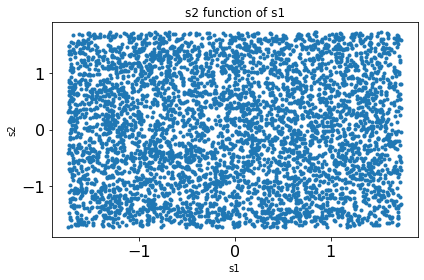

(5000, 2)


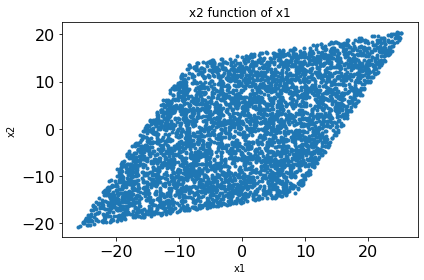

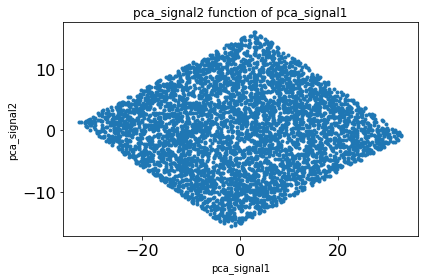

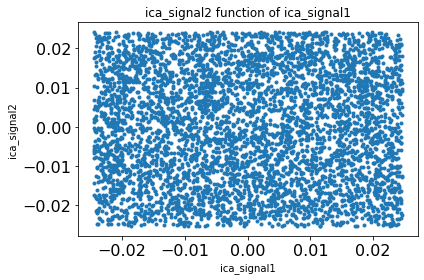

In [28]:
import numpy as np 
import random
import math

from sklearn.decomposition import FastICA, PCA

from make_graphs import *


# -------------------------------------------------------------------------------------
# 1. Generating two uniformly distributed sources
# -------------------------------------------------------------------------------------
s1 = np.random.uniform(-np.sqrt(3),np.sqrt(3),5000)
s2 = np.random.uniform(-np.sqrt(3),np.sqrt(3),5000)
scatter_plot(s1, s2, 's2 function of s1', 's1', 's2', True)
# -------------------------------------------------------------------------------------
# 2. Generating the mixed signals
# -------------------------------------------------------------------------------------
A=np.array([[5,10],[10,2]])
mixed_signals=np.dot(np.array([s1,s2]).T,A)
x1 = mixed_signals[:,0]
x2 = mixed_signals[:,1]
scatter_plot(x1, x2, 'x2 function of x1', 'x1', 'x2', True)
# -------------------------------------------------------------------------------------
# 3. Principal components analysis 
# -------------------------------------------------------------------------------------
pca = PCA()
pca_signals = pca.fit_transform(mixed_signals)
pca_signal1=pca_signals[:,0]
pca_signal2=pca_signals[:,1]
scatter_plot(pca_signal1, pca_signal2, 'pca_signal2 function of pca_signal1', 'pca_signal1', 'pca_signal2', True)
# -------------------------------------------------------------------------------------
# 4. Independent component analysis 
# -------------------------------------------------------------------------------------
ica=FastICA()
ica_signals = ica.fit_transform(pca_signals)
ica_signal1 = ica_signals[:,0]
ica_signal2 = ica_signals[:,1]
scatter_plot(ica_signal1, ica_signal2, 'ica_signal2 function of ica_signal1', 'ica_signal1', 'ica_signal2', True)

<font size=5 color=#009999> <b>3. ECG data </b> </font> <br> <br>

The purpose of this second part is to use the ICA in order to separate fetal and maternal ECG
signals from ECG recordings performed on the mother’s abdomen.

<ol>
   <li> Import the data <samp>foetal_ecg.csv</samp>. This dataset includes 8 recording channels of skin potentials taken on the abdomen of a pregnant woman. The first column represents the time and the 8 following ones are the data.
<div class="alert alert-info">
<b>Read a csv with Pandas</b>  <br>
We provide you the few lines of code that are necessary to read the csv containing the data. Be sure to understand those and understand the meaning of each argument. 
</div>
       
   <li> Visualize the channels using the <samp>ecg_plot</samp> function (from the <samp>make_graphs.py</samp> file). The graph is shown below. Fetal activity is of lower amplitude and poorly visible
without zoom.
       <img src="imgs/ecg.png" width = "400">
       
   <li> Use the <samp>sklearn.decomposition.FastICA</samp> function to separate the cardiac activities. Plot also the obtained components using the <samp>ecg_plot</samp> function. Are the 2 cardiac activities properly separated?
</ol>

[0.000e+00 4.000e-03 8.000e-03 ... 9.988e+00 9.992e+00 9.996e+00]


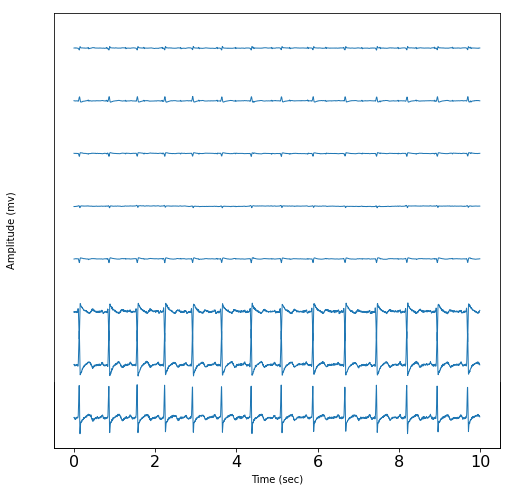

(9, 2500)
(9, 2500)
(2500, 6)


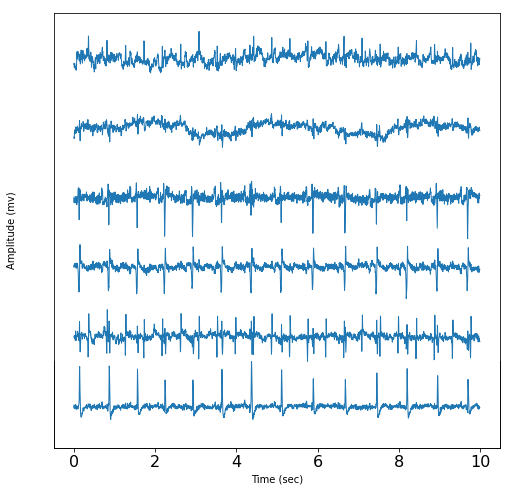

In [103]:
import pandas as pd

# -------------------------------------------------------------------------------------
# 1. Read the ECG signals
# -------------------------------------------------------------------------------------
df  = pd.read_table('ecgData/foetal_ecg.csv', sep="\s+", header=None)
ecg = np.transpose(df.values)
print(ecg[0])

# -------------------------------------------------------------------------------------
# 2. Visualize the channels
# -------------------------------------------------------------------------------------
ecg_plot(ecg,True)
print(ecg.shape)
# -------------------------------------------------------------------------------------
# 3. Recovers independant signals with ICA
# -------------------------------------------------------------------------------------

ica2 =FastICA(n_components=6)
print(ecg.shape)
ica_ecg = ica2.fit_transform(ecg[1:,].T)
print(ica_ecg.shape)
ica_ecg=np.insert(ica_ecg.T,0,ecg[0],axis=0)
ecg_plot(ica_ecg,True)
#for k in range(ica_ecg.shape[1]):
#    scatter_plot(ecg[0],ica_ecg[:,k],"ICA signal{}".format(k),'time','ICA',True)

<font size=5 color=#009999> <b>4. EEG data </b> </font> <br> <br>

The objective of this part is to use the ICA in order to separate different activities within an EEG recording from a patient suffering from temporal lobe epilepsy. 

<div class="alert alert-info">
<b>MNE Library</b>  <br>
To this aim, use the MNE library https://mne.tools/stable/index.html This library provides very helpful tools, both for visualization and ICA computing, that you should use for the project.
</div>

 <br>
The montage used in the recordings, i.e. standard 10-20 system, is displayed in figure below.
<img src="imgs/eeg_1020.png" width = "250">

<ol>
   <li> Import the data sig_ictal.cvs. This dataset includes 21 recording channels of scalp
electrodes in the following order:
       ch\_names = ['Fp2', 'F8', 'T4', 'T6', 'O2', 'F4', 'C4', 'P4', 'Fz', 'Cz', 'Pz', 'Fp1', 'F7', 'T3', 'T5', 'O1', 'F3', 'C3', 'P3', 'T1', 'T2']
   Note that the two last channels (T1 and T2) are not part of the standard 10-20 montage. They are not usually used for ICA analysis, you can then ignore them.<br>
The sampling rate of these recordings is 250Hz.
   <li> Visualize the signals with the provided eeg_plot function and highlight at what times and on which channels do ocular, muscular or epileptic activities appear. Figure below illustrates what you are expected to obtain.
       <img src="imgs/eeg_sig.png" width = "600">
   Epileptic activity can be observed on channels F8, T4 and T6. Eye blinks appear at times 2.5s, 3.4s, 6s and 7.6s. Muscular artifacts are visible during the interval 0s - 3.9s on channels F7, T3, T5 and T1 as well as between 5s - 10s on channels F8, T4, F4, C4 and P4.
   <li> With MNE library, perform an ICA analysis and observe the obtained components. For this purpose, use the the <samp>mne.preprocessing.ICA</samp> function with the following arguments <samp>method="infomax", random_state=1</samp> to create an "ica" object on which you can run the <samp>ica.fit</samp> function. Visualize whether the separation of the events cited in the previous question is well executed.<br>
    Hints: In order to perform the ICA, you will need to create :<br>
    <ol>
   <li> a "raw" with the <samp>mne.io.RawArray</samp> object to create the data (Note that you will have to create the info dictionary). Then call <samp>raw.set_montage</samp> with appropriate arguments.<br>
    <li> an "ica" object with the <samp>mne.preprocessing.ICA(method="infomax", random_state=1)</samp> call. You then can use the class methods described in the documentation on the ica object instance.
    </ol>
       
   <li> Use the <samp>plot_components</samp> function from the MNE library on your result. What is the meaning of the topological plot that you obtained (also shown in figure below)?
    <img src="imgs/topoplot.png" width = "600">
</ol>


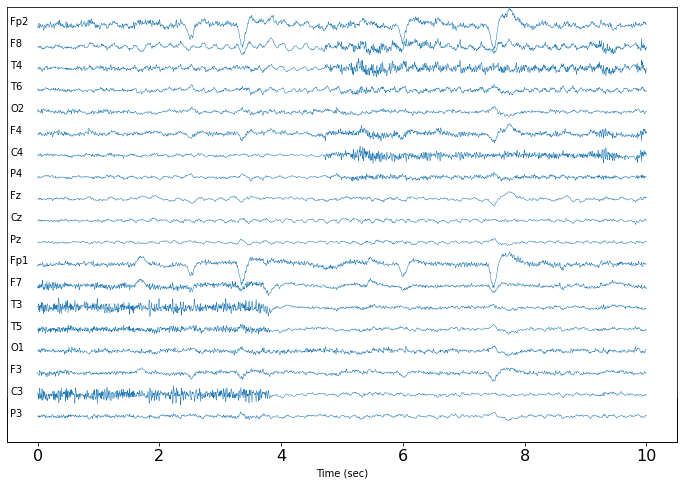

Creating RawArray with float64 data, n_channels=19, n_times=2500
    Range : 0 ... 2499 =      0.000 ...     9.996 secs
Ready.
Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 18 components
 


<ipython-input-116-33261c91253e>:26: DeprecationWarning: Version 0.23 introduced max_iter="auto", setting max_iter=1000 for `fastica` and max_iter=500 for `infomax` and `picard`. The current default of max_iter=200 will be changed to "auto" in version 0.24.
  mne_ica = mne.preprocessing.ICA(random_state=1,method="infomax")
<ipython-input-116-33261c91253e>:28: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  mne_ica.fit(raw)


Fitting ICA took 0.8s.


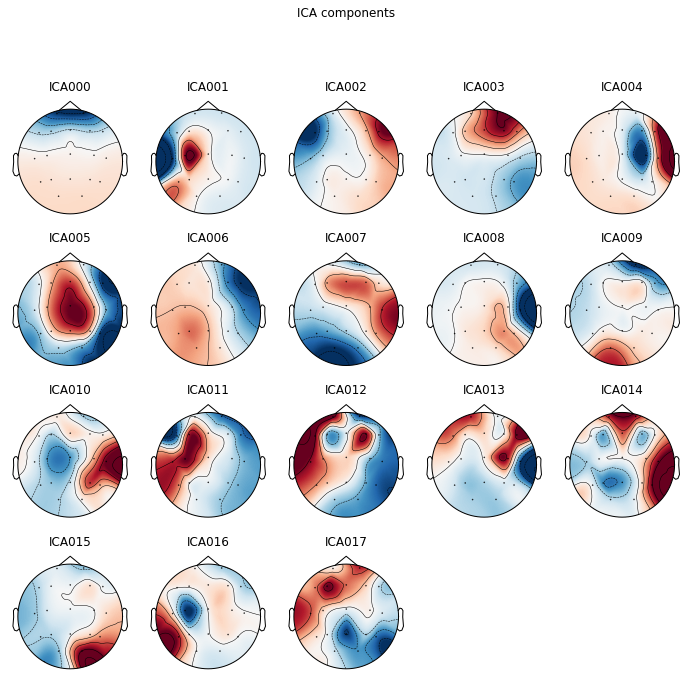

[<MNEFigure size 702x696.24 with 18 Axes>]

In [116]:
import mne 

# -------------------------------------------------------------------------------------
# 1. Read the data
# -------------------------------------------------------------------------------------
# The file contains 21 channels. However, the two last (A1-A2) are usually not used for these analysis. 
# We will ignore them
nb_channels = 19
ch_names    = ['Fp2', 'F8', 'T4', 'T6', 'O2', 'F4', 'C4', 'P4', 'Fz', 'Cz', 'Pz', 'Fp1', 'F7', 'T3', 'T5', 'O1', 'F3', 'C3', 'P3']
df  = pd.read_table('eegData/sig_ictal.csv', sep="\s+", header=None)
df = df.drop([19,20],axis=1)
eeg = np.transpose(df.values)
time = np.linspace(0,10,2500,endpoint=True)
eeg= np.insert(eeg,0,time,axis=0)
#print(eeg)
# -------------------------------------------------------------------------------------
# 2. Channels visualization
# -------------------------------------------------------------------------------------
eeg_plot(eeg,ch_names,True)
# -------------------------------------------------------------------------------------
# 3. Recover independant components with ICA
# -------------------------------------------------------------------------------------
info = mne.create_info(ch_names, 250, ch_types=["eeg"] * nb_channels)
raw  = mne.io.RawArray(eeg[1:], info)
raw.set_montage("standard_1020")
mne_ica = mne.preprocessing.ICA(random_state=1,method="infomax")

mne_ica.fit(raw)
# -------------------------------------------------------------------------------------
# 4. Topoplot
# -------------------------------------------------------------------------------------
mne_ica.plot_components()